# Extracting Text from PDF Files

Let's look at how to extract text from a PDF file, using the [`pdfx`](https://www.metachris.com/pdfx/) library in Python.

First we need to install the library:

In [1]:
!pip install pdfx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


Next, let's work with an example from the corpus in the [Rich Context leaderboard competition](https://github.com/Coleridge-Initiative/rclc/blob/master/corpus.ttl) – a machine learning competition about parsing named entities from PDFs of open access research publications.

The following snippets in [TTL format](https://en.wikipedia.org/wiki/Turtle_(syntax)) show a research paper `publication-7aa3d69253e37668541c` hosted on [EuropePMC](https://europepmc.org/) that has a known link to a dataset `dataset-0a7b604ab2e52411d45a` hosted by the [Centers for Disease Control and Prevention](https://wwwn.cdc.gov/nchs/nhanes/).

```
:publication-7aa3d69253e37668541c
  rdf:type :ResearchPublication ;
  foaf:page "http://europepmc.org/articles/PMC3001474"^^xsd:anyURI ;
  dct:publisher "PLoS One" ;
  dct:title "VKORC1 common variation and bone mineral density in the Third National Health and Nutrition Examination Survey" ;
  dct:identifier "10.1371/journal.pone.0015088" ;
  :openAccess "http://europepmc.org/articles/PMC3001474?pdf=render"^^xsd:anyURI ;
  cito:citesAsDataSource :dataset-0a7b604ab2e52411d45a ;
.

:dataset-0a7b604ab2e52411d45a
  rdf:type :Dataset ;
  foaf:page "https://wwwn.cdc.gov/nchs/nhanes/"^^xsd:anyURI ;
  dct:publisher "Centers for Disease Control and Prevention" ;
  dct:title "National Health and Nutrition Examination Survey" ;
  dct:alternative "NHANES" ;
  dct:alternative "NHANES I" ;
  dct:alternative "NHANES II" ;
  dct:alternative "NHANES III" ;
.
```

The paper is:

  * ["VKORC1 common variation and bone mineral density in the Third National Health and Nutrition Examination Survey"](http://europepmc.org/articles/PMC3001474); Dana C. Crawford, Kristin Brown-Gentry, Mark J. Rieder; _PLoS One_. 2010; 5(12): e15088.

We'll used `pdfx` to download the PDF file directly from the open access URL:

In [3]:
import pdfx

#pdf = pdfx.PDFx("http://europepmc.org/articles/PMC3001474?pdf=render")
pdf = pdfx.PDFx("1.pdf")
pdf

Next, use the `get_text()` function to extract the text from the `pdf` object:

In [4]:
text = pdf.get_text()
text

'PCCP\n\nPAPER\n\nReceived 16th January 2015,\nAccepted 17th February 2015\n\nDOI: 10.1039/c5cp00258c\n\nwww.rsc.org/pccp\n\nIntroduction\n\nComplex transition metal hydrides incorporating\nionic hydrogen: thermal decomposition pathway\nof Na2Mg2FeH8 and Na2Mg2RuH8\n\nTerry D. Humphries,*a Motoaki Matsuo,b Guanqiao Lia and Shin-ichi Orimoab\n\nComplex transition metal hydrides have potential\n\ntechnological application as hydrogen storage\n\nmaterials, smart windows and sensors. Recent exploration of these materials has revealed that the\n\nincorporation of anionic hydrogen into these systems expands the potential number of viable\n\ncomplexes, while varying the countercation allows for optimisation of their thermodynamic stability. In\nthis study, the optimised synthesis of Na2Mg2TH8 (T = Fe, Ru) has been achieved and their thermal\ndecomposition properties studied by ex situ Powder X-ray Diﬀraction, Gas Chromatography and\n\nPressure-Composition Isotherm measurements. The temperatur

In [6]:
import re

# Find the indices of the words "Experimental" and "Results"
experimental_index = text.index("Experimental")
results_index = text.index("Results")

# Extract the words between the two indices
words_between = text[experimental_index + len("Experimental") + 1:results_index]

# Split the extracted text into words
words_between = words_between

# Print the words
print(words_between)



All preparation and manipulation was performed in a Miwa
glove box filled with purified argon (o1 ppm O2 and the dew
point of H2O below 190 K) to avoid contamination.

The synthesis of Na2Mg2FeH8 was carried out by two methods:
S1 followed a four step process, which first required the synthesis
of Mg2FeH6. This was achieved by mechanically milling (Fritsch
Pulverisette 7) MgH2 (hydrogen storage grade, Sigma Aldrich) and
Fe (99.99%, Mitsuwa) powders at a molar ratio of 2 : 1 for 2 h at
400 rpm (ball-to-powder ratio 40 : 1), under argon with subsequent
heat treatment of the pelletised powder at 400 1C for 20 h under
3 MPa H2. The resultant olive green powder was then mechani-
cally milled with NaH (95%, Sigma Aldrich) at a molar ratio of
1 : 2 for 20 h under argon (S1-BM) with subsequent heat
treatment of the pelletised powder at 400 1C for 20 h under
30 MPa H2. The product was yielded as an olive green powder.
The synthesis of S2 (Na2Mg2FeH8) followed a two-step pro-
cess. NaH, MgH2 an

In [7]:
# prompt: create a dataframe and store the PDF name and the words_between but rename the words_between column as Experimental section
import pandas as pd
df = pd.DataFrame({'PDF Name': ['1.pdf'], 'Experimental Section': [words_between]})
df

,PDF Name,Experimental Section
0,1.pdf,\nAll preparation and manipulation was perform...


In [17]:
import pdfx
import re
import pandas as pd
# Define the starting number and the arbitrary ending number.
start_num = 1
end_num = 140
# Create an empty list to store the file names.
pdf_list = []
# Loop through the range of numbers and create file names.
for num in range(start_num, end_num + 1):
    file_name = str(num) + ".pdf"
    pdf_list.append(file_name)

print(pdf_list)
#pdf_list = ['1.pdf', '2.pdf', '3.pdf']
df = pd.DataFrame()

error_pdfs = []

for pdf_name in pdf_list:
    try:
        pdf = pdfx.PDFx(pdf_name)
        text = pdf.get_text()

        experimental_index = text.index("Experimental")
        results_index = text.index("Results")

        words_between = text[experimental_index + len("Experimental") + 1:results_index]
        words_between = words_between

        df_temp = pd.DataFrame({'PDF Name': [pdf_name], 'Experimental Section': [words_between]})
        df = pd.concat([df, df_temp], ignore_index=True)
    except Exception as e:
        print(f"Error processing file '{pdf_name}': {e}")
        error_pdfs.append(pdf_name)
        continue

['1.pdf', '2.pdf', '3.pdf', '4.pdf', '5.pdf', '6.pdf', '7.pdf', '8.pdf', '9.pdf', '10.pdf', '11.pdf', '12.pdf', '13.pdf', '14.pdf', '15.pdf', '16.pdf', '17.pdf', '18.pdf', '19.pdf', '20.pdf', '21.pdf', '22.pdf', '23.pdf', '24.pdf', '25.pdf', '26.pdf', '27.pdf', '28.pdf', '29.pdf', '30.pdf', '31.pdf', '32.pdf', '33.pdf', '34.pdf', '35.pdf', '36.pdf', '37.pdf', '38.pdf', '39.pdf', '40.pdf', '41.pdf', '42.pdf', '43.pdf', '44.pdf', '45.pdf', '46.pdf', '47.pdf', '48.pdf', '49.pdf', '50.pdf', '51.pdf', '52.pdf', '53.pdf', '54.pdf', '55.pdf', '56.pdf', '57.pdf', '58.pdf', '59.pdf', '60.pdf', '61.pdf', '62.pdf', '63.pdf', '64.pdf', '65.pdf', '66.pdf', '67.pdf', '68.pdf', '69.pdf', '70.pdf', '71.pdf', '72.pdf', '73.pdf', '74.pdf', '75.pdf', '76.pdf', '77.pdf', '78.pdf', '79.pdf', '80.pdf', '81.pdf', '82.pdf', '83.pdf', '84.pdf', '85.pdf', '86.pdf', '87.pdf', '88.pdf', '89.pdf', '90.pdf', '91.pdf', '92.pdf', '93.pdf', '94.pdf', '95.pdf', '96.pdf', '97.pdf', '98.pdf', '99.pdf', '100.pdf', '101.pd

In [18]:
df

,PDF Name,Experimental Section
0,1.pdf,\nAll preparation and manipulation was perform...
1,2.pdf,"\n(Alfa Aesar, 98%), KBH4(Alfa Aesar, 98%) and..."
2,3.pdf,y and theoretically performance\ninvestigation...
3,4.pdf,"\n\nFor the sample synthesis, all the el..."
4,5.pdf,\n\nAll handling of chemicals and sealabl...
...,...,...
103,133.pdf,and theoretical studies on static and\ndynamic...
104,135.pdf,\nThe materials were prepared by mechanical al...
105,136.pdf,\nAll samples were synthesized by melting high...
106,137.pdf,\nFig. 1 shows the schematic diagram of an exp...


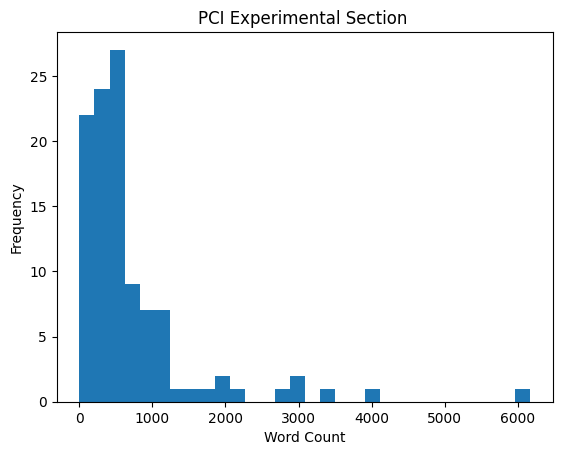

In [22]:
# prompt: Using dataframe df: plot the histogram of the word count of the experimental section

import pandas as pd
import matplotlib.pyplot as plt

# Create a new column with the word count of the experimental section
df['word_count'] = df['Experimental Section'].str.split().str.len()

# Plot the histogram
plt.hist(df['word_count'], bins=30)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('PCI Experimental Section ')
plt.show()


In [23]:
df

,PDF Name,Experimental Section,word_count
0,1.pdf,\nAll preparation and manipulation was perform...,501
1,2.pdf,"\n(Alfa Aesar, 98%), KBH4(Alfa Aesar, 98%) and...",621
2,3.pdf,y and theoretically performance\ninvestigation...,2885
3,4.pdf,"\n\nFor the sample synthesis, all the el...",310
4,5.pdf,\n\nAll handling of chemicals and sealabl...,905
...,...,...,...
103,133.pdf,and theoretical studies on static and\ndynamic...,2765
104,135.pdf,\nThe materials were prepared by mechanical al...,199
105,136.pdf,\nAll samples were synthesized by melting high...,365
106,137.pdf,\nFig. 1 shows the schematic diagram of an exp...,196


In [19]:

df.to_csv('experimental_sections_PCI_PDF.csv')


Now we can use `spaCy` to parse that text:

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

Let's look at a dataframe of the parsed tokens:

In [ ]:
import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
df

The parsed text shows lots of characters that could be cleaned up, but for this demo, let's run *named entity resolution* in `spaCy` to extract the entities:

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Great, that identified multiple mentions of the _NHANES_ dataset:

  * `the Third National Health and Nutrition Examination Survey` _ORG_
  * `NHANES III` _PERSON_
  
The default labels aren't correct, but we could [update the Named Entity Recognizer](https://spacy.io/usage/training#ner) in `spaCy` to fix that.